## 총점 및 순위 계산

### 1. 읽어들일 파일명 지정 ==> 가지고 있는 파일명으로 수정필요

In [1]:
########### file_name 선언 ##################################
전처리데이터셋 = 'C:\\Users\\ATIV\\Desktop\\전기차표준분석모델_교육자료\\정제데이터_제출본\\전처리데이터2.csv'
##########################################################

### 2. 화면에 출력되는 칼럼명을 확인한 후, 필요한 칼럼명을 복사하여 붙여넣기 (수정 불필요)

In [2]:
import pandas as pd
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('gid', inplace=True)
전체칼럼 = df.columns.tolist()
print ("여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.\n", 전체칼럼)

여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.
 ['주차장', '건물1', '건물2', '건물3', '행정기관', '도서관', '생산가능인구', '전기차', '충전소', '교통량', '유동인구', '관공서', '경도', '위도', '거리_전기차', '거리_충전소', '거리_교통량']


### 3. 하단에 있는 "점수칼럼"에 점수로 환산할 대상인 칼럼을 수정하도록 함 ==> 수정 필요

In [3]:
#점수칼럼 =  ['건물1', '건물2', '건물3', '관공서', '도서관', '경제인구', '교통량', '전기차', '관광지']
점수칼럼 =  ['주차장', '건물1', '건물2', '건물3', '행정기관', '도서관', '생산가능인구', '전기차', '충전소', '교통량', '유동인구', '관공서','거리_전기차', '거리_충전소', '거리_교통량']
print("입력한 점수컬럼명은 다음과 같음\n", 점수칼럼)

가중치 = [1] * len(점수칼럼)

입력한 점수컬럼명은 다음과 같음
 ['주차장', '건물1', '건물2', '건물3', '행정기관', '도서관', '생산가능인구', '전기차', '충전소', '교통량', '유동인구', '관공서', '거리_전기차', '거리_충전소', '거리_교통량']


### 4. 건물 가중치 선언 ==> 필요시 수정
- 각 건물과 관광지에 대한 가중치를 수기로 선언함
- 필요시 가중치 조절 하십시오 
- 필요시 가중치 추가 또는 삭제 하십시오

In [4]:
#점수칼럼  순서대로 점수칼럼 갯수만큼 가중치를 입력하십시오

#예를들어 이렇게 가중치를 주고 싶을 경우에는
#건물1가중치=1
#건물2가중치 = 2
#건물3가중치  = 3
#관광지가중치=1
#도서관가충치=1
#경제인구가중치=1
#전기차가중치=1
#아래 처럼 입력합니다.

##### 여기만 수정하면 됩니다 ###############################
가중치 = [2, 1, 1, 1, 1, 1, 2, 3, 
       3, 3, 1, 1,3, 3, 2]      # 점수칼럼 갯수 만큼, 구분은 쉼표
##### 여기만 수정하면 됩니다 ###############################


# 수정 불필요
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다")
else:
    print("다음 줄을 실행 하세요")

다음 줄을 실행 하세요


### 5. 이하 별도 언급 시까지 수정 불필요
- 6.1에서 수정 필요

In [5]:
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('gid', inplace=True)

################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
pre_process_set = pre_process_set.sort_values(by='gid')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('gid', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################


# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['gid','주차장','경도','위도'], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=False).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(20))

# 최종 결과 CSV 파일쓰기
final.to_csv('결과_총점.csv', index=False, sep=',', encoding='cp949')

'결과'

,gid,주차장,경도,위도,건물1,건물2,건물3,행정기관,도서관,생산가능인구,전기차,충전소,교통량,유동인구,관공서,거리_전기차,거리_충전소,거리_교통량,sum,순위
0,다바680689,0.000000,127.141766,36.818201,0.26,0.000000,0.000000,0.5,0.0,0.358799,0.00,1.5,0.000000,0.044368,0.050182,3.0,3.0,2.0,10.713350,1
1,다바689665,0.000000,127.151955,36.796596,0.14,0.058824,0.000000,0.0,0.0,0.158254,0.00,0.0,2.256799,0.031344,0.033908,3.0,3.0,2.0,10.679129,2
2,다바654687,0.000000,127.112624,36.816307,0.00,0.000000,0.000000,1.0,0.0,0.000000,0.00,1.5,0.000000,0.051373,0.051373,3.0,3.0,2.0,10.602746,3
3,다바678675,0.000000,127.139583,36.805574,0.20,0.000000,0.000000,0.5,0.0,0.315143,0.00,1.5,0.000000,0.040506,0.045613,3.0,3.0,2.0,10.601262,4
4,다바659672,0.000000,127.118297,36.802803,0.02,0.235294,0.000000,0.0,0.0,0.688950,0.00,1.5,0.000000,0.040182,0.051345,3.0,3.0,2.0,10.535770,5
5,다바681709,0.000000,127.142804,36.836234,0.04,0.176471,0.000000,0.0,0.0,2.000000,0.00,0.0,0.000000,0.033032,0.065438,3.0,3.0,2.0,10.314941,6
6,다바688681,0.666667,127.150769,36.811016,0.10,0.000000,0.000000,0.5,0.0,0.129604,0.00,1.5,0.000000,0.008948,0.011048,3.0,3.0,2.0,10.249601,7
7,다바699682,0.666667,127.163097,36.811953,0.00,0.000000,0.000000,0.5,0.0,0.120055,0.00,1.5,0.000000,0.055778,0.057723,3.0,3.0,2.0,10.233555,8
8,다바663670,0.000000,127.122790,36.801015,0.00,0.000000,0.000000,0.5,0.0,0.000000,1.56,0.0,0.000000,0.035356,0.035356,3.0,3.0,2.0,10.130712,9
9,다바687680,0.000000,127.149652,36.810112,0.46,0.000000,0.000000,0.0,0.0,0.046385,0.00,1.5,0.000000,0.034230,0.034981,3.0,3.0,2.0,10.075596,10


## 6. 지도로 보기
- 인터넷 환경이 안되면 생략

### 6.1 지도로 보기 선택 사항
- 상단에서 도출된 결과값들 중에서 상위 3개만 지도로 보여주기
- Google Map 처럼 보여지며, 마우스로 스크롤하면 지도 크기가 Zoom 됨
- 이를 위해서 Anaconda Promprt 창을 열고 아래 함수를 복사하여 그대로 엔터
 - pip install folium

#### 수정 필요 - 수정 안하면 상위 20개를 조회

In [24]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 3   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

### 6.2 수정 불필요

In [25]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'위도'],final.loc[i,'경도']], zoom_start = 15)
    folium.Marker([final.loc[i,'위도'],final.loc[i,'경도']]).add_to(지도보기)
    print (final.loc[i,'위도'],final.loc[i,'경도'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

보고자 하는 상위권 갯수는 3개 입니다.
36.81820133 127.14176640000001


'상위 1번째 격자의 센터 위치 보기'

36.79659637 127.15195520000002


'상위 2번째 격자의 센터 위치 보기'

36.81630704 127.112624


'상위 3번째 격자의 센터 위치 보기'

In [ ]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
지도보기 = folium.Map(location=[final.loc[1,'위도'],final.loc[1,'경도']], zoom_start = 15)
folium.Marker([final.loc[1,'위도'],final.loc[1,'경도']]).add_to(지도보기)
print (final.loc[1,'위도'],final.loc[1,'경도'])
display(f'상위 {1}번째 격자의 센터 위치 보기', 지도보기)

### 6. Box Plot 보기 선택 사항 - 수정 불필요
- 상기 선택사항 실행여부와 무관하게 9번은 실행가능함
- 값들이 몇점대에 몰려 있는지 확인해보는 Box Plot 그래프
- 맨 하단부에 몰려 있을 가능성이 높음. 이유는 절반이상이 0점이기 때문

In [21]:
#참고) 총점 분포도
import matplotlib.pyplot as plt

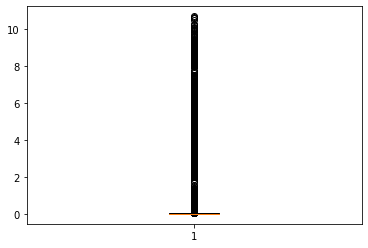

In [22]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()

끝